In [23]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Cargamos Datos

In [24]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

## Tamaño de las imagenes

In [25]:
train_data.shape # La dimension de los ejemplos de imagenes 

(60000, 28, 28)

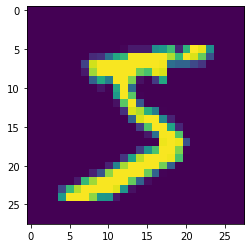

In [26]:
plt.imshow(train_data[0]); # Nos muestra la primera imagen 

## Modelo

In [27]:
model = models.Sequential() # Modelo Secuencial

#Agregamos Capas
#Activacion por 512 neuronas y la dimension de la imagenes es 28*28

model.add(layers.Dense(512, activation ='relu', input_shape=(28*28,)))

#Agregamos la capa de salida de 10 neuronas ya que tenemos 10 posibles salidas
model.add(layers.Dense(10,activation = 'softmax'))

In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics = 'accuracy')

In [29]:
# LA Arquitectura
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Vemos que:
- En la primera capa recibe 512 neuronas y que maneja 401920 parametros
- En la segunda capa recibe 10 neuronas y que maneja 5130 parametros

## Entrenamos el modelo

In [30]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255 # Lo divido por 255 porq es el valor maximo que puede tener cada pixel

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [31]:
x_train[0] # ahora está en escala de grises de 0 a 1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
# Realizamos una transformacion 

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [33]:
train_labels[0] # nos indica que tiene en esa posicion 

5

In [34]:
y_train[0] 
# Tiene la diez posibles, pero nos marca un 1 en donde está la información. 
# La red neuronal maneja mejor de manera vectorial.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [35]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

# x  e y son nuestros datos
# epochs son la cantidad de reinteraciones
# batch_size son lotes o parches de 128 unidades

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2529 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9890


In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9811


[0.06372934579849243, 0.9811000227928162]